In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd  
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

2024-01-28 04:52:28.114037: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-28 04:52:29.889684: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 04:52:29.889774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 04:52:30.165043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 04:52:30.759317: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-28 04:52:30.760172: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [8]:
data = pd.read_csv('/workspaces/AITemplate/Kaggle/EEG_Sleepy_Driver/Datasets/acquiredDataset.csv')
#data.head()
#data.describe()
#data.info()
#data.isnull().sum()

attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64

In [10]:
data["attention"] = data["attention"]/(data["attention"].max()*10)
data["meditation"] = data["meditation"]/(data["meditation"].max()*10)
data["delta"] = data["delta"]/data["delta"].max()
data["theta"] = data["theta"]/data["theta"].max()
data["lowAlpha"] = data["lowAlpha"]/data["lowAlpha"].max()
data["highAlpha"] = data["highAlpha"]/data["highAlpha"].max()
data["lowBeta"] = data["lowBeta"]/data["lowBeta"].max()
data["highBeta"] = data["highBeta"]/data["highBeta"].max()
data["lowGamma"] = data["lowGamma"]/data["lowGamma"].max()
data["highGamma"] = data["highGamma"]/data["highGamma"].max()

data.describe()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
count,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3735.00000
mean,0.048215,0.056578,0.144153,0.042651,0.047801,0.038909,0.043053,0.052474,0.028060,0.089645,0.42838
std,0.021877,0.019067,0.166665,0.068104,0.074350,0.067030,0.062395,0.099013,0.053660,0.141604,0.49491
min,0.001000,0.001000,0.000060,0.000043,0.000046,0.000011,0.000003,0.000007,0.000021,0.000020,0.00000
25%,0.035000,0.043000,0.020006,0.007348,0.010589,0.008790,0.010478,0.010961,0.007768,0.002441,0.00000
50%,0.048000,0.056000,0.077077,0.018148,0.023578,0.018994,0.023241,0.021955,0.015348,0.024566,0.00000
75%,0.063000,0.069000,0.216205,0.047423,0.053964,0.042175,0.050770,0.046882,0.030465,0.110673,1.00000
max,0.100000,0.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [12]:
X = data.drop(['classification'], axis=1)
y = data['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/30
2390/2390 [==============================] - 3s 1ms/step - loss: 0.6333 - accuracy: 0.6435 - val_loss: 0.5854 - val_accuracy: 0.6839
Epoch 2/30
2390/2390 [==============================] - 2s 1ms/step - loss: 0.5994 - accuracy: 0.6703 - val_loss: 0.5694 - val_accuracy: 0.6940
Epoch 3/30
2390/2390 [==============================] - 2s 1ms/step - loss: 0.5827 - accuracy: 0.6736 - val_loss: 0.5516 - val_accuracy: 0.7074
Epoch 4/30
2390/2390 [==============================] - 2s 1ms/step - loss: 0.5691 - accuracy: 0.6962 - val_loss: 0.5526 - val_accuracy: 0.7157
Epoch 5/30
2390/2390 [==============================] - 2s 1ms/step - loss: 0.5595 - accuracy: 0.7042 - val_loss: 0.5501 - val_accuracy: 0.7074
Epoch 6/30
2390/2390 [==============================] - 2s 1ms/step - loss: 0.5535 - accuracy: 0.7092 - val_loss: 0.5412 - val_accuracy: 0.7140
Epoch 7/30
2390/2390 [==============================] - 2s 1ms/step - loss: 0.5409 - accuracy: 0.7151 - val_loss: 0.5320 - val_accuracy:

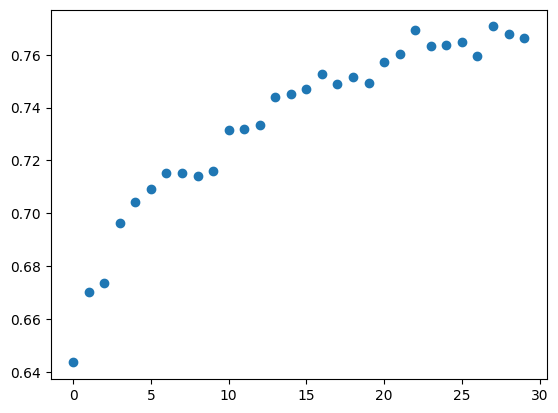

In [17]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
number_of_epochs = 30
hisotry = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=1, validation_split=0.2)

model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (model.evaluate(X_test, y_test)[1]*100))

plt.scatter(range(number_of_epochs), hisotry.history['accuracy'], label='Training Accuracy')
#plt.scatter(range(number_of_epochs), hisotry.history['val_accuracy'], label='Validation Accuracy')

model.save('model.h5')